## 모멘텀 = 주가 혹은 이익의 추세
### 상승 추세의 주식은 지속적으로 상승
### 하락 추세의 주식은 지속적으로 하락

### 기업의 이익에 대한 추세를 나타내는 이익 모멘텀
### 주가의 모멘텀에 대한 가격 모멘텀으로 구분
### 일반적으로 과거 12개월 수익률이 높았던 종목이 계속해서 상승하는 현상을 모멘텀이라고 함


## 모멘텀 효과 = 기업의 가치 변화에 대한 사람들의 반응때문
### 기업 이익이 증가하면 내재가치(펀더멘털 가치) 역시 증가
### 주식의 가격은 늘 새로운 정보에 반응해 상승하지만
### 초기에는 이익에 대해 과소 반응하여 상승폭이 낮고, 그 이후 계속해서 상승하는 경향이 있음
### 주식의 가격이 가치에 수렴하기 위해 상승하다 보면 투자자의 주목을 끌게 되고 양때효과로 인해 따라붙게됨
### 그 결과, 과잉반응이 발생해 주가는 계속해서 상승하고 모멘텀 효과 발생
### 투자자들이 기업 가치에 비해 주가가 과해졌다 판단하는 순간, 주가는 하락하기 시작하고 'REVERSAL'발생

In [6]:
# 필요한 라이브러리 및 모듈 임포트
import pandas_datareader.data as web
from pandas_datareader.famafrench import get_available_datasets
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# 차트 환경설정
mpl.rcParams['font.family'] = 'Malgun Gothic' # window
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

In [7]:
# 필요한 데이터 다운로드
df_mom = web.DataReader('10_Portfolios_Prior_12_2',
                       'famafrench',
                       start='1900-01-01') 

In [8]:
 df_mom_vw = df_mom[0]  # df_mom 에서 0번째 컬럼이 vw(시가총액 가중평균)값

In [9]:
df_mom_cum = np.log(1+  df_mom_vw / 100).cumsum()# np.log(1 + np_mom_vw /100) 로그 수익률 계산
# np.log(1 + np_mom_vw /100).comsum() # 누적 로그 수익률 계산

<Axes: title={'center': '모멘텀 포트폴리오 누적수익률'}, xlabel='Date'>

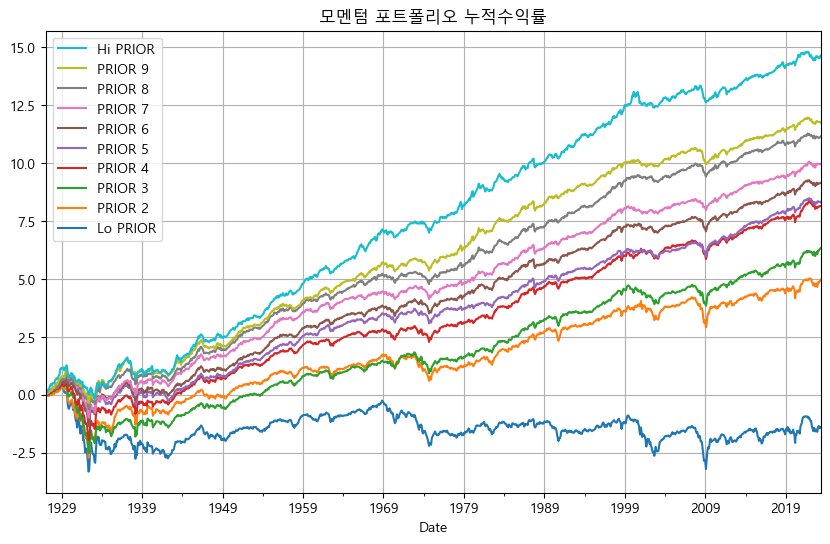

In [10]:
# df_mom_cum.plot()
df_mom_cum.plot(figsize=(10,6),
               legend='reverse',
               title='모멘텀 포트폴리오 누적수익률')

### Hi Prior가 가장 높음 -> Prior 9 -> ... Lo Prior

### 최근 12개월 수익률이 높을수록 수익률이 높다


## 모멘텀 종목 구하기

In [4]:
from sqlalchemy import create_engine
import pandas as pd

In [5]:
import pymysql

con = pymysql.connect(
    user='root',
    passwd='dowksi123!@#',
    host='127.0.0.1',
    db='stock_db',
    charset='utf8'
)

mycursor = con.cursor()
query = """
select * from kor_ticker
where 기준일 = (select max(기준일) from kor_ticker) 
	and 종목구분 = '보통주';
"""

mycursor.execute(query)  # excute를 통해 query를 data 변수 로 보내게됨 
data = mycursor.fetchall()  # fetchall()  서버로부터 data를 가져옴
con.close() # 데이터베이스와의 연결을 종료

data
ticker_list = pd.DataFrame(data,columns=['종목코드','종목명','시장구분','종가','시가총액','기준일','EPS','선행EPS','BPS','주당배당금','종목구분'])
ticker_list.head()

,종목코드,종목명,시장구분,종가,시가총액,기준일,EPS,선행EPS,BPS,주당배당금,종목구분
0,000020,동화약품,KOSPI,10370.0,2.896490e+11,2023-07-05,736.0,1317.0,13165.0,180.0,보통주
1,000040,KR모터스,KOSPI,575.0,5.527960e+10,2023-07-05,NaN,NaN,345.0,0.0,보통주
2,000050,경방,KOSPI,9700.0,2.659280e+11,2023-07-05,177.0,NaN,30304.0,125.0,보통주
3,000070,삼양홀딩스,KOSPI,72200.0,6.183400e+11,2023-07-05,9173.0,NaN,240995.0,3500.0,보통주
4,000080,하이트진로,KOSPI,21450.0,1.504370e+12,2023-07-05,1250.0,1424.0,16906.0,950.0,보통주
